In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

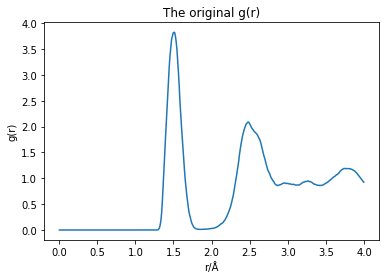

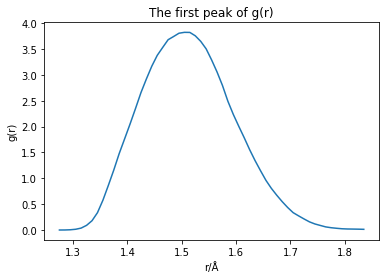

In [2]:
#读取 g(r) 的数据 并绘制原始图片
rdf = np.loadtxt('./rdf-ave.txt')
plt.title('The original g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf[:,0],rdf[:,1],)
plt.show()

#截取 g(r) 第一峰的数据
rdf_1 = rdf[127:184,:]
plt.title('The first peak of g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf_1[:,0],rdf_1[:,1],)
plt.show()

# example

import numpy as np  
from scipy.stats import norm  
import matplotlib.pyplot as plt  

data = norm.rvs(loc=0,scale=1,size=200)  
mu1 = np.mean(data)  
std1 = np.std(data)  
print(mu1)
print(std1)  
***mu, std = norm.fit(data)***

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')  
xmin, xmax = plt.xlim()  
x = np.linspace(xmin, xmax, 100)  
p = norm.pdf(x, mu, std)  
q = norm.pdf(x, mu1, std1)  
plt.plot(x, p, 'k', linewidth=2)  
plt.plot(x, q, 'r', linewidth=1)  
title = "Fit results: mu = %.5f,  std = %.5f" % (mu, std)  
plt.title(title)  

plt.show()

In [3]:
# Fit the normal distribution function
#Step 1.首先根据经验来分别对Gauss peak 的均值、方差和权值进行初始化
mu1=1.42;sigma1=0.13;w1=0.38   #sp2 peak
mu2=1.54;sigma2=0.13;w2=0.61   #sp3 peak
a = rdf_1[:,0]

def em(a,mu1,sigma1,w1,mu2,sigma2,w2):
    d=1
    n = len(a)  # 样本长度
    
    # E-step
    #计算响应
    #p1=w1*flot(stats.norm(mu1,sigmal))
    p1 =w1*norm
    p2=w2*stats.norm(mu2,sigma2).pdf(a)
    #p1, p2权重 * 两个peak的后验概率
    R1i = p1 / (p1 + p2)
    R2i= p2 / (p1 + p2)

    # M-step
    # mu的更新
    #mu1=np.sum(R1i * a)/np.sum(R1i)
    #mu2 = np.sum(R2i * a) / np.sum(R2i)
    #禁用 mu 的更新

    #sigmal的更新
    sigma1=np.sqrt(np.sum(R1i*np.square(a - mu1))/(d*np.sum(R1i)))
    sigma2 = np.sqrt(np.sum(R2i * np.square(a - mu2)) / (d * np.sum(R2i)))
        
    #w的更新
    w1 = np.sum(R1i) / n
    w2 = np.sum(R2i) / n

    return mu1,sigma1,w1,mu2,sigma2,w2

#
plt.plot(rdf_1[:,0],rdf_1[:,1],'g.') 
x1 = np.linspace(1 ,2 ,100)
p = norm.pdf(x1 ,mu ,sigma) 
#sp2 = norm.pdf(x1 ,mu1 , sigma1) 
#sp3 = norm.pdf(x1 ,mu2 , sigma2) 
plt.plot(x1 ,p ,'b' , linewidth=2) 
#plt.plot(x1 ,sp2 ,'r' , linewidth=1) 
#plt.plot(x1 ,sp3 ,'r' , linewidth=1) 
title = "Fit results: mu = %.5f, std = %.5f" % (mu, std)
plt.title(title)
plt.show()

NameError: name 'mu' is not defined

In [ ]:
#Draw the fixed gauss
#x1 = np.linspace(mu1 - 1*sigma1, mu1 + 1*sigma1, 400)
x1 = np.linspace(1 ,2 ,100)
y1 = w1*normal_distribution(x1, mu1, sigma1)
#x2 = np.linspace(mu2 - 1*sigma2, mu2 + 1*sigma2, 400)
x2 = np.linspace(1 ,2 ,100)
y2 = w2*normal_distribution(x2, mu2, sigma2)

plt.title('The fixed gauss peaks')
plt.plot(x1 ,y1 ,'g.' ,label='y1')
plt.plot(x2 ,y2, 'r.' ,label='y2')

plt.show()

In [ ]:
# show the fix result
plt.title('The fix result')
x = (x1 + x2)/2
y = y1 + y2
plt.plot(x ,y ,'b.' ,label='y1')
plt.show()

In [ ]:
# draw the totel figure
plt.subplot(2,2,1)
plt.title('The original g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf[:,0],rdf[:,1],)

plt.subplot(2,2,2)
plt.title('The first peak of g(r)')
plt.xlabel('r/Å')
plt.ylabel('g(r)')
plt.plot(rdf_1[:,0],rdf_1[:,1],)

plt.subplot(2,2,3)
plt.title('The two fixed peaks')
plt.plot(x1 ,y1 ,'g.' ,label='y1')
plt.plot(x2 ,y2, 'r.' ,label='y2')
plt.xlim(1.2,1.84)

plt.subplot(2,2,4)
plt.title('The fix result')
x = (x1 + x2)/2
y = y1 + y2
plt.plot(x ,y ,'b.' ,label='y1')

plt.show()